# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dums = dataset['Genre']
dums = pd.get_dummies(dums)
dataset = dataset.drop('Genre', axis=1)
dataset = dataset.assign(male=dums['Male'], female=dums['Female'])
dataset.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),male,female
0,1,19,15,39,1,0
1,2,21,15,81,1,0
2,3,20,16,6,0,1
3,4,23,16,77,0,1
4,5,31,17,40,0,1


In [3]:
X = dataset.iloc[:, -4:-1].values
X[:10]

array([[15, 39,  1],
       [15, 81,  1],
       [16,  6,  0],
       [16, 77,  0],
       [17, 40,  0],
       [17, 76,  0],
       [18,  6,  0],
       [18, 94,  0],
       [19,  3,  1],
       [19, 72,  0]], dtype=int64)

## Using the dendrogram to find the optimal number of clusters

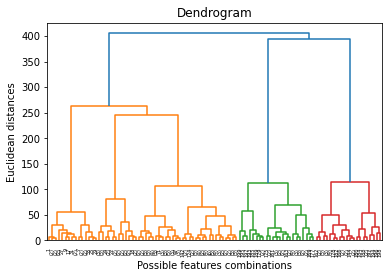

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
L = linkage(X, method = 'ward') # ward: sum of squared deviations (variance) from the mean when the clusters are merged

# Plot the dendrogram
#dendrogram = dendrogram(L)
dendrogram = dendrogram(L, p=100,
                        truncate_mode='lastp',
                        orientation='top'
                        ) # show the most recent 4 clusters formed by the merging process

plt.title('Dendrogram')
plt.xlabel('Possible features combinations')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [5]:
from sklearn.cluster import AgglomerativeClustering

# the threshold of the dendorgram is 5 (eye-check of the graph above)
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)   # AgglomerativeClustering is an unsupervised learning algorithm, meaning it does not require or use a target variable during the clustering process.


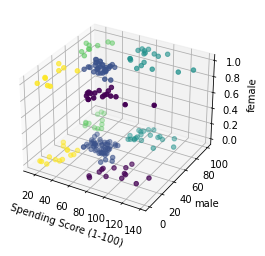

In [6]:
# Create a 3D scatter plot with cluster labels and centroids
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each data point colored by their cluster number (# hc.labels_)
ax.scatter(X[:, -3], X[:, -2], X[:, -1], c=hc.labels_, cmap='viridis')


# Set labels for the axes
ax.set_xlabel(dataset.columns.tolist()[-3])
ax.set_ylabel(dataset.columns.tolist()[-2])
ax.set_zlabel(dataset.columns.tolist()[-1])

# Step 6: Show the plot
plt.show()

## Visualising the clusters

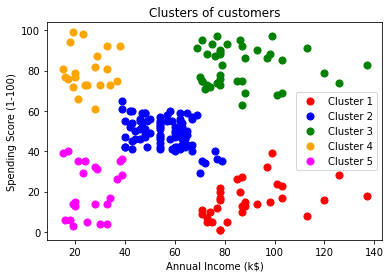

In [7]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()